In [3]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read the data
df = pd.read_csv("AirQualityUCI.csv", parse_dates=[['Date', 'Time']])

In [22]:
df.head(3)

,Date_Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  9357 non-null   datetime64[ns]
 1   CO         9357 non-null   float64       
 2   PT08S1     9357 non-null   int64         
 3   NMHC       9357 non-null   int64         
 4   C6H6       9357 non-null   float64       
 5   PT08S2     9357 non-null   int64         
 6   NOx        9357 non-null   int64         
 7   PT08S3     9357 non-null   int64         
 8   NO2        9357 non-null   int64         
 9   PT08S4     9357 non-null   int64         
 10  PT08S5     9357 non-null   int64         
 11  T          9357 non-null   float64       
 12  RH         9357 non-null   float64       
 13  AH         9357 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 1023.5 KB


In [24]:
df['Date_Time'] = pd.to_datetime(df.Date_Time , format = '%d/%m/%Y %H.%M.%S')
data = df.drop(['Date_Time'], axis=1)
data.index = df.Date_Time

In [25]:
data

,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406


In [9]:
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
        if data[j][i] == -200:
            data[j][i] = data[j][i-1]
cols

<ipython-input-9-bfb6bc14260f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j][i] = data[j][i-1]


Index(['CO', 'PT08S1', 'NMHC', 'C6H6', 'PT08S2', 'NOx', 'PT08S3', 'NO2',
       'PT08S4', 'PT08S5', 'T', 'RH', 'AH'],
      dtype='object')

In [10]:
#missing value treatment
data.isnull().sum()

CO        0
PT08S1    0
NMHC      0
C6H6      0
PT08S2    0
NOx       0
PT08S3    0
NO2       0
PT08S4    0
PT08S5    0
T         0
RH        0
AH        0
dtype: int64

In [24]:
#creating the train and validation set
length = int(0.8*(len(data)))
train = data[:length]
valid = data[length:]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [50]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [52]:
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

TypeError: only integer scalar arrays can be converted to a scalar index

In [18]:
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[2.34596328e+00 1.08633212e+03 2.80762173e+02 1.24130779e+01
  1.05535947e+03 2.80882233e+02 6.59534851e+02 1.68444418e+02
  1.15918056e+03 8.50845529e+02 2.73639014e+01 1.55311062e+01
  5.15317053e-01]]


F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


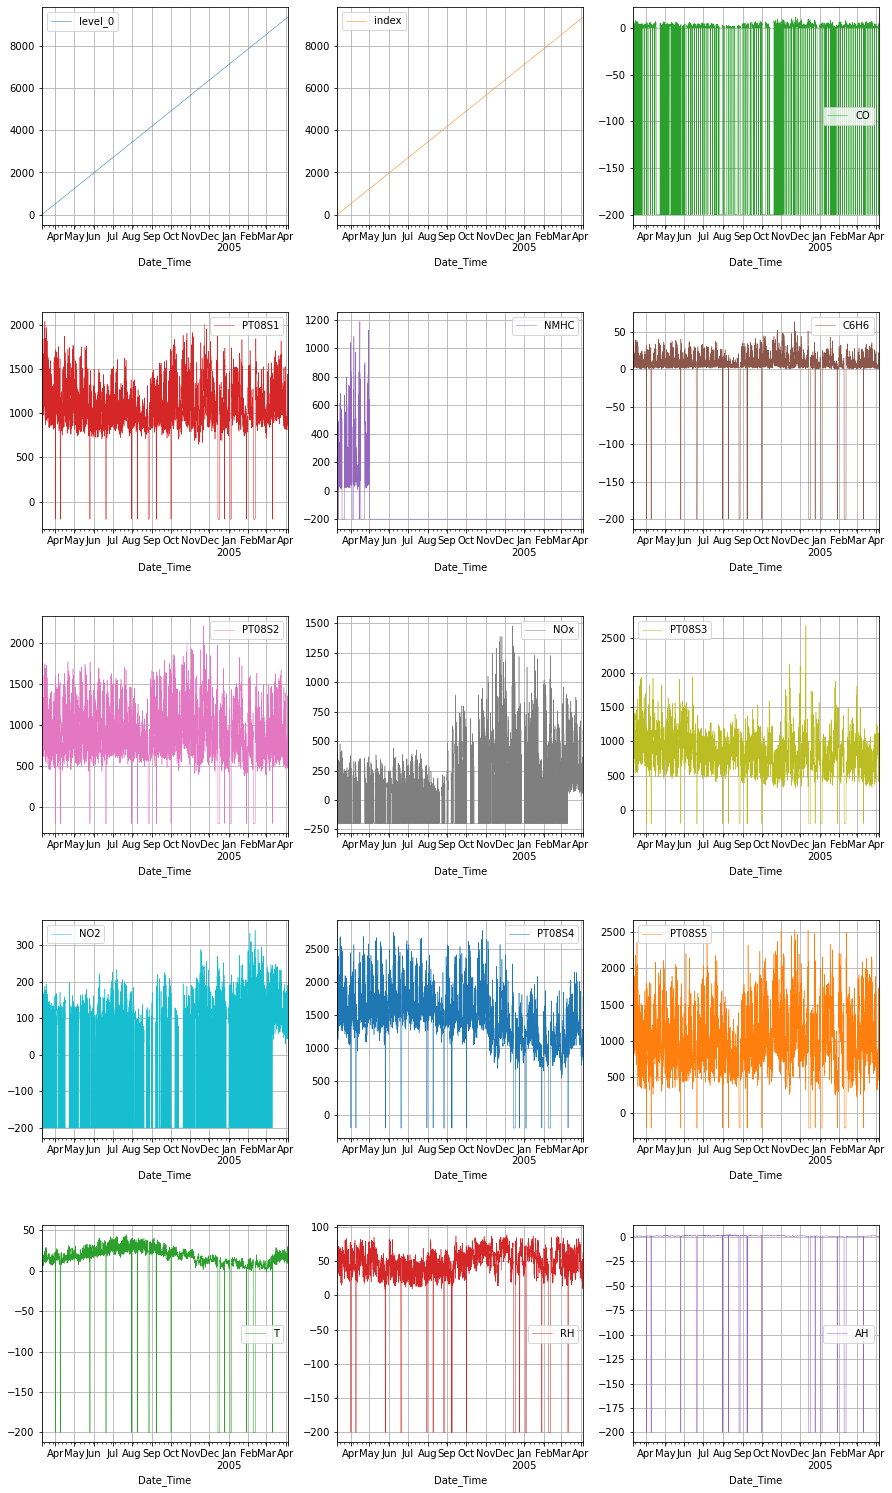

In [28]:
data.reset_index(inplace=True)
df_copy = data.copy()
ax = df_copy.plot(x='Date_Time', subplots=True, grid=True, layout=(11,3), sharex=False, sharey=False,
                  linewidth=0.5, figsize=(15,60))
plt.subplots_adjust(hspace=0.4)
plt.show()